<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/project_phase_1/Project/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Moneyball: Buy Runs to Buy Wins

Evaluate Influence of Runs Scored and Runs Allowed on Wins

In [ ]:
!wget -O Baseball.csv https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True

--2020-09-28 00:39:03--  https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv [following]
--2020-09-28 00:39:04--  https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv [following]
--2020-09-28 00:39:04--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [ ]:
!res_dir=./resources

!if [[ -e $res_dir ]]; then rm -rf $res_dir; fi
!mkdir $res_dir

In [ ]:
import pandas as pd
data = pd.read_csv('Baseball.csv')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [ ]:
!rm Baseball.csv

In [ ]:
##Get the features of interest
features = [ 'RS', 'RA' ]
output = [ 'W' ]

work_data = data[ features + output ]

In [ ]:
work_data = work_data.to_numpy()
X = work_data[:, :-1]
Y = work_data[:, -1]

Compare the Actual Wins with the Projected Wins from the Pythagorean Win Percentage

In [ ]:
##Pythagorean win percentage is given by
## W = RS^2/(RS^2 + RA^2) * 162
## W = 162/(1 + (RA/RS)^2 )
pyth_wins = 162//(1 + (X[:,features.index('RA')]/X[:,features.index('RS')])**2)

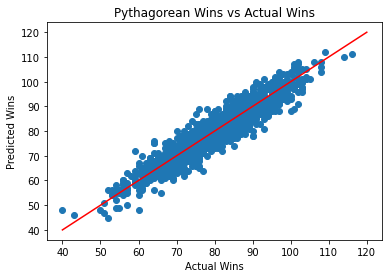

In [ ]:
import matplotlib.pyplot as plt

##Plot the actual wins those predicted by the pythagorean wins
plt.scatter(Y, pyth_wins)
plt.plot([40, 120], [40, 120], color='red')
plt.ylabel('Predicted Wins')
plt.xlabel('Actual Wins')
plt.title('Pythagorean Wins vs Actual Wins')
plt.savefig('pythagorean_wins.png')
plt.show()

##Manufacturing Runs Analysis

In [ ]:
##Get the features and ouput of interest
features = [ 'OBP', 'SLG', 'BA' ]
output = ['RS']

run_data = data[ features + output ]
run_data.head()

,OBP,SLG,BA,RS
0,0.328,0.418,0.259,734
1,0.320,0.389,0.247,700
2,0.311,0.417,0.247,712
3,0.315,0.415,0.260,734
4,0.302,0.378,0.240,613


Evaluate Metrics of Data

In [ ]:
run_data[features].describe().T.to_csv('off_stats.csv')
run_data[features].describe().T

,count,mean,std,min,25%,50%,75%,max
OBP,1232.0,0.326331,0.015013,0.277,0.317,0.326,0.337,0.373
SLG,1232.0,0.397342,0.033267,0.301,0.375,0.396,0.421,0.491
BA,1232.0,0.259273,0.012907,0.214,0.251,0.260,0.268,0.294


In [ ]:
run_data[output].describe().T.to_csv('runs_scored.csv')
run_data[output].describe().T

,count,mean,std,min,25%,50%,75%,max
RS,1232.0,715.081981,91.534294,463.0,652.0,711.0,775.0,1009.0


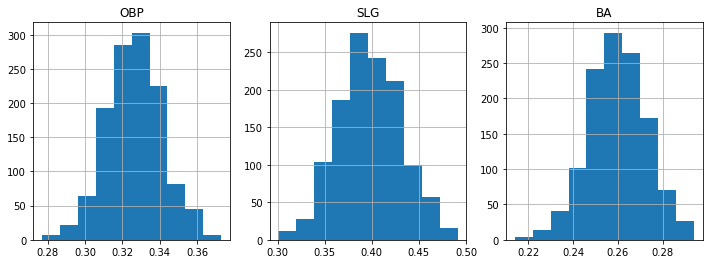

In [ ]:
import matplotlib.pyplot as plt

x_dim = len(features)
fig, axes = plt.subplots( nrows = 1, ncols = x_dim, figsize = (x_dim * 4,4) )

for i in range(x_dim):
  plt.subplot(1, x_dim, i + 1)
  axes[i] = run_data[ features[i] ].hist()
  axes[i].set_title( features[i] )

plt.savefig('x_features_hist.png')


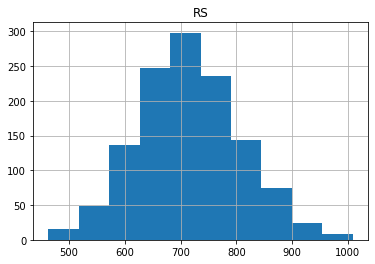

In [ ]:
import matplotlib.pyplot as plt

run_data[output].hist()

plt.savefig('runs_scored_hist.png')
plt.show()

Evaluate Heatmap to Identify Correlation Between Inputs and Outputs

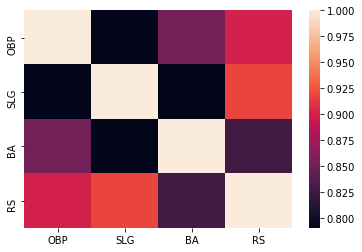

In [ ]:
import seaborn as sns
correlation = run_data.corr()
svm = sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

figure = svm.get_figure()
figure.savefig('svm_conf.png')

Normalize Data

In [ ]:
##Set the input vector and outputs
X = run_data[features].to_numpy()
Y = run_data[output].to_numpy()

In [ ]:
##Normalize data according to the Mean and Standard Deviation
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

##Download Information for Report

In [ ]:
!mv *.png $res_dir
!mv *.csv $res_dir

In [ ]:
!tar -cvf phase1.tar $res_dir

./resources/
./resources/runs_scored.csv
./resources/pythagorean_wins.png
./resources/x_features_hist.png
./resources/svm_conf.png
./resources/runs_scored_hist.png
./resources/off_stats.csv


In [ ]:
from google.colab import files

files.download('phase1.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>